In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

In [3]:
# Definiendo sistema de ecuaciones
def funciones(xi,y,alpha,n,h,Upsilon,varkappa):
    psi_ , eta_, psi1_, eta1_ = y
    dydxi = [-h*(eta_+ xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1 + 1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
            ,xi**(2) * psi_**(n)
            ,-(h/xi/(xi - 2*Upsilon*(n+1)*eta_)/(1 + alpha*n/Upsilon/(n+1)/psi_))*((eta1_ + 3*xi**(2)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)) + xi**(3)*(n+1)*Upsilon*psi_**(n)*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n))) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+ 1/n)) + alpha*(psi_**(n) - varkappa)))*((n+1)*Upsilon*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_) - n*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa))*psi1_/psi_**(n+1)) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n)))*((2*Upsilon*(n+1)*eta1_ - 1)/(xi - 2*Upsilon*(n+1)*eta_) + alpha*n*psi1_/(1 + alpha*n/Upsilon/(n+1)/psi_)/Upsilon/(n+1)/psi_**(2) - 1/xi))
            ,2*xi*psi_**(n) + n*xi**(2)*psi_**(n-1)*psi1_] 
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en S.I.
Msun = 1.989*10**(30)      # Masa solar en S.I.

* $Modelo\ Genérico: M = 1.5 \, M_{\odot}, \, R = 10.0 \, km$

    $C = 0.05 ; \, n = 0.8 ; \,  \rho_c = 1.5\times10^{18} \, kg/m^{3} ; \, \alpha = -0.01 ; \, \varkappa = 0.2 ; \, \sigma = 0.2$

In [5]:
C = 0.05  # Valor de C para anisotropía

h = 1 - 2*C

sigma = 0.2 

rho_c = 1.5*10**(18)

alpha = -0.01 # Constante del término lineal

varkappa = 0.2 # Razón entre densidad en el borde y densidad central

# n: índice polítropo
Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

ListaModelos = []

In [6]:
Lista_Modelos = []

In [7]:
for i in range(len(Lista_n)):
    
    n = Lista_n[i]
    
    Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
        
    # Condiciones iniciales
    Psi0 = 1.0
    Eta0 = 0.0
    Psi10 = 0.0
    Eta10 = 0.0
    
    y0 = [Psi0,Eta0,Psi10,Eta10]
    
    def stop_condition(xi,y,alpha,n,h,Upsilon,varkappa):
        return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
    
    stop_condition.terminal = True
    
    xi0 = 10**(-15)
    ximax = 10000
    
    xi_span = (xi0,ximax)
        
    soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(alpha,n,h,Upsilon,varkappa),max_step=1/50)
    
    Psi = soluciones.y[0]
    Eta = soluciones.y[1]
    Psi1 = soluciones.y[2]
    Eta1 = soluciones.y[3]
    xi = soluciones.t   
        
    #########################################################################################################################
    
    # Xi normalizada
    xiNorm = xi/xi[-1]
    
    Densidad = Psi**(n)
    
    # Presión entre presión central
    PNorm = (1/sigma)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))
    
    # Presión tangencial
    PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(Psi**(n) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))/sigma/(xi - 2*Upsilon*(n+1)*Eta) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))/sigma
    
    m = (c**(2)*Upsilon*(n+1)/(4*np.pi*rho_c)**(1/3)/G)**(3/2)*Eta/Msun   # Masa en unidades de masa solar
    mM = m/m[-1]
    mr = 2*Upsilon*(n+1)*Eta/xi                                           # 2*G*m/c**(2)/r
           
    e2lambda = (1 - mr)
    
    e2nu = (1 + Upsilon*(Psi - (varkappa**(1 + 1/n))/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))**(-2*(n+1)/h)*(1 - 2*Upsilon*(n+1)*Eta[-1]/xi[-1])
    
                                            # 2                          #6      
    ListaModelos.append([xiNorm, Densidad, PNorm, PTNorm, mM, e2lambda, e2nu])    

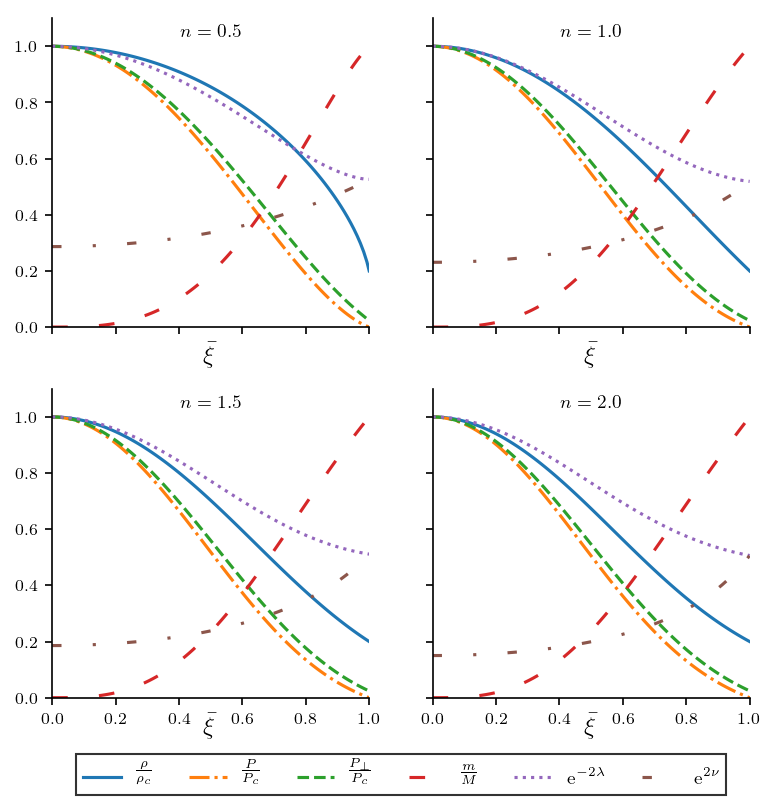

In [8]:
axes = ()

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(6,6),dpi=150)

Labels = [r'$\frac{\rho}{\rho_{c}}$',r'$\frac{P}{P_{c}}$',r'$\frac{P_{\perp}}{P_{c}}$',r'$\frac{m}{M}$',
        r'$\mathrm{e}^{- 2 \lambda}$',r'$\mathrm{e}^{2 \nu}$']

Line_Styles = ['-','-.','--',(0,(5,10)),':',(0,(3,10,1,10))]

ax = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]


for i in range(len(ax)):
    
    for j in range(1,len(ListaModelos[0])):
        
        ax[i].plot(ListaModelos[i][0],ListaModelos[i][j],'-',label=Labels[j-1],linestyle=Line_Styles[j-1])
        ax[i].set_xbound(0.0,1.0)
        ax[i].set_ybound(0.0,1.1)
        ax[i].set_xlabel(r'$\bar{\xi}$',fontsize=12)
        ax[i].xaxis.set_label_coords(0.5, -0.05)
        ax[i].set_title(r'$n = {}$'.format(Lista_n[i]),x=0.5,y=0.9,fontsize=9)
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')
        
    
ax[3].legend(ncol=6,loc=(-1.125,-0.315),edgecolor='k',fancybox=False,fontsize=9)

plt.show()

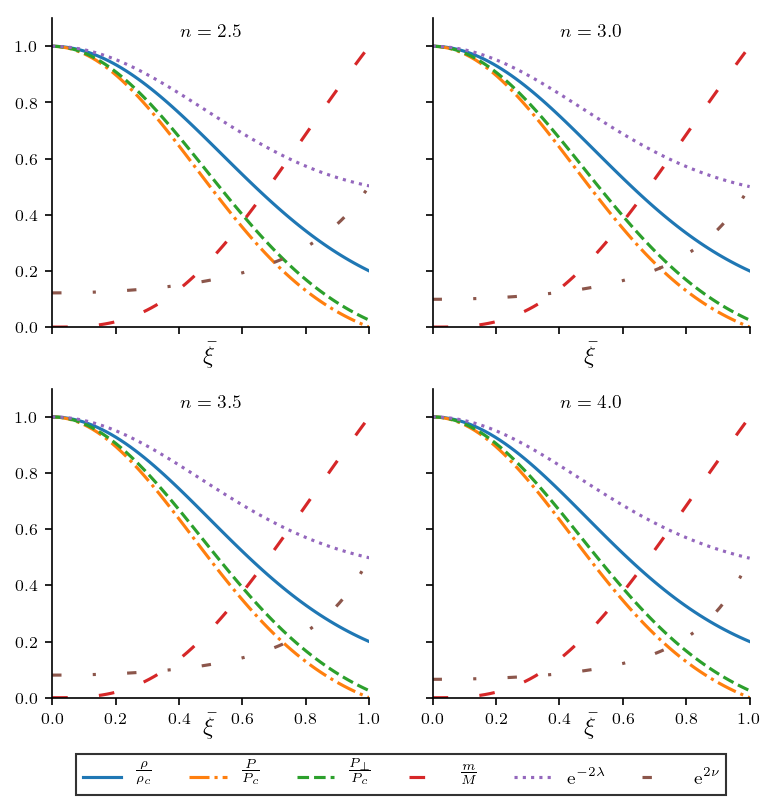

In [9]:
axes = ()

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(6,6),dpi=150)

Labels = [r'$\frac{\rho}{\rho_{c}}$',r'$\frac{P}{P_{c}}$',r'$\frac{P_{\perp}}{P_{c}}$',r'$\frac{m}{M}$',
        r'$\mathrm{e}^{- 2 \lambda}$',r'$\mathrm{e}^{2 \nu}$']

ax = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]


for i in range(len(ax)):
    
    for j in range(1,len(ListaModelos[0])):
        
        ax[i].plot(ListaModelos[i+len(ax)][0],ListaModelos[i+len(ax)][j],'-',label=Labels[j-1],linestyle=Line_Styles[j-1])
        ax[i].set_xbound(0.0,1.0)
        ax[i].set_ybound(0.0,1.1)
        ax[i].set_xlabel(r'$\bar{\xi}$',fontsize=12)
        ax[i].xaxis.set_label_coords(0.5, -0.05)
        ax[i].set_title(r'$n = {}$'.format(Lista_n[i+len(ax)]),x=0.5,y=0.9,fontsize=9)
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')
        
    
ax[3].legend(ncol=6,loc=(-1.125,-0.315),edgecolor='k',fancybox=False,fontsize=9)

plt.show()